In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

### 1. train/test split 비율

In [4]:
data = """
Split   Accuracy    Precision   Recall  F1
X(3.5)  76  66.17   22.92   34.04
2.0:1   74.31   53.14   41.93   46.87
1.8:1   73.68   51.45   46.09   48.63
1.6:1   72.34   48.89   51.82   50.32
1.4:1   72.13   48.56   52.6    50.5
1.2:1   69.67   45.17   57.29   50.52
1.0:1   67  43.02   68.23   52.77
"""

# 데이터를 DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# 결과 출력
df

,Split,Accuracy,Precision,Recall,F1
0,X(3.5),76.00,66.17,22.92,34.04
1,2.0:1,74.31,53.14,41.93,46.87
2,1.8:1,73.68,51.45,46.09,48.63
3,1.6:1,72.34,48.89,51.82,50.32
4,1.4:1,72.13,48.56,52.60,50.50
5,1.2:1,69.67,45.17,57.29,50.52
6,1.0:1,67.00,43.02,68.23,52.77


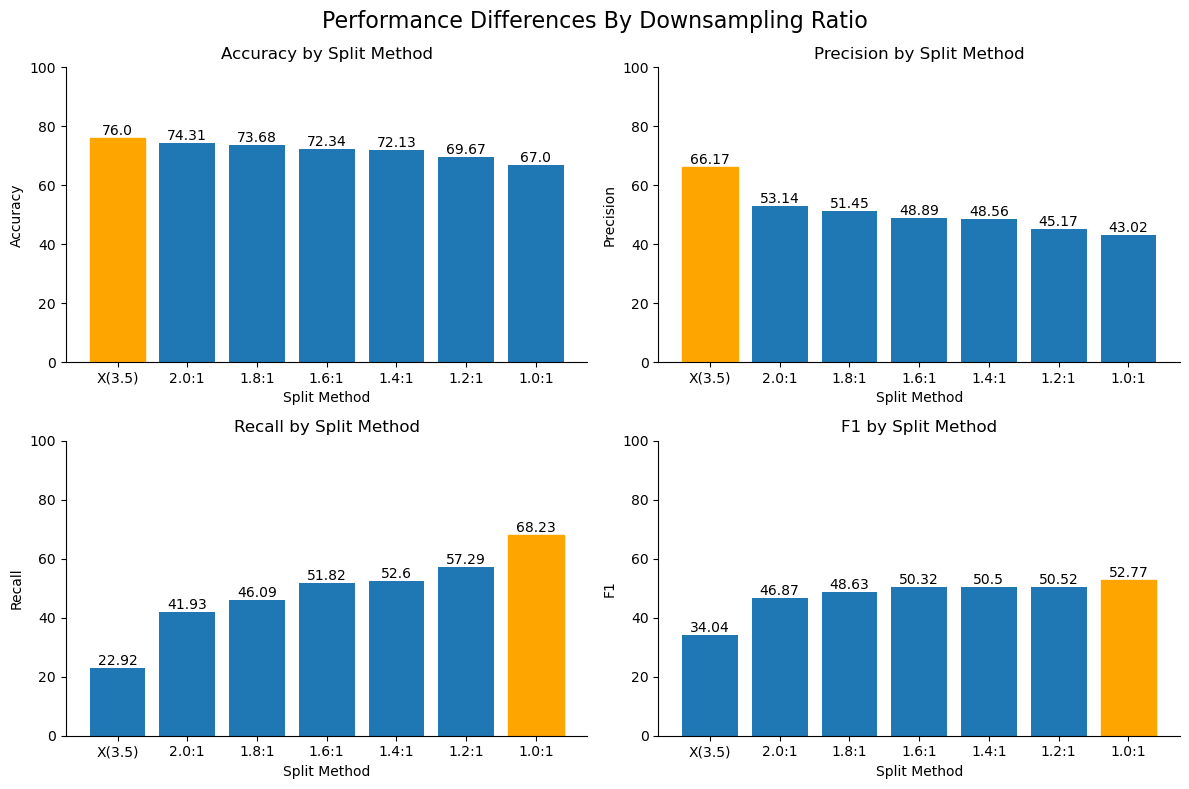

In [5]:
# 지표 컬럼 선택
metrics = df.columns[1:]

# 지표 데이터 추출
data_values = df[metrics].values

# Split 컬럼 추출
split_methods = df['Split'].values

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Differences By Downsampling Ratio', fontsize=16)  # 전체 subplot 제목
axs = axs.ravel()

for i, metric in enumerate(metrics):
    bars = axs[i].bar(split_methods, data_values[:, i])
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Split Method")
    axs[i].set_xlabel("Split Method")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

    max_height = max(data_values[:, i])
    for bar in bars:
        yval = bar.get_height()
        if yval == max_height:
            bar.set_color('orange')  # 가장 높은 막대의 색깔 변경
        axs[i].text(bar.get_x() + bar.get_width() / 2.0, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2. OSI vs Baseline Cut

In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Value   Accuracy    Precision   Recall  F1
Mean    64.92   41.025   67.905    51.14
Baseline_Cut   50   49   27.3   35.1
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Value 열을 인덱스로 설정
df.set_index('Value', inplace=True)
df

In [ ]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Overlap OI&OSI(mean) Comparison with Baseline Cut', fontsize=16)  # 전체 subplot 제목
axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars_mean = df.loc['Mean', [metric]].values[0]
    bars_baseline = df.loc['Baseline_Cut', [metric]].values[0]
    
    axs[i].bar(['Mean', 'Baseline Cut'], [bars_mean, bars_baseline])
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Value")
    axs[i].set_xlabel("Value")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거
    
    # 큰 값의 색깔 변경
    if bars_mean > bars_baseline:
        axs[i].get_children()[0].set_color('orange')
    else:
        axs[i].get_children()[1].set_color('orange')
    
    # 박스 위에 값을 표시
    axs[i].text(0, bars_mean + 2, f'{bars_mean:.2f}', ha='center', color='black', fontweight='bold')
    axs[i].text(1, bars_baseline + 2, f'{bars_baseline:.2f}', ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

### 3. Overlap OSI 결측치&모델별 성능 차이

In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    67.03   43.3   69.51    53.36
TabNet 54.62   34.01   71.52   46.1
Decision_Tree   59.61   36.2   64.13   46.28
Logistic_Regression  65.63   40.51   56.95   47.34
SVM    67.21   41.04   47.76   44.15
"""

# DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

In [ ]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('50% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()

In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    65.27   41.08   64.57    50.22
TabNet 62.35   35.8   48.88   41.33
Decision_Tree   59.61   36.2   64.13   46.28
Logistic_Regression  65.63   41.13   61.88   49.42
SVM    63.56   37.72   52.69   43.97
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

In [ ]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('30% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()


In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    64.84   41.01   67.49    51.02
TabNet 63.93   39.33   60.76   47.75
Decision_Tree   58.45   36.3   70.4   47.9
Logistic_Regression  64.36   40.25   64.8   49.66
SVM    64.17   40.4   67.49   50.55
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

In [ ]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('10% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()


In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Model   Accuracy    Precision   Recall  F1
XGB    63.99   40.47   69.51    51.16
TabNet 60.58   37.47   67.71   48.24
Decision_Tree   58.70   36.62   71.52   48.44
Logistic_Regression  64.23   40.19   65.25   49.74
SVM    62.71   39.39   69.51   50.28
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# Model 열을 인덱스로 설정
df.set_index('Model', inplace=True)
df

In [ ]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('1% Missing Value Model Performance', fontsize=16)  # 전체 subplot 제목

axs = axs.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    bars = df[metric]
    max_bar = bars.max()
    
    bars.plot(kind='bar', ax=axs[i], color=[('orange' if x == max_bar else 'blue') for x in bars])
    
    for j, bar in enumerate(bars):
        axs[i].text(j, bar + 2, f'{bar:.2f}', ha='center', color='black', fontweight='bold')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f"{metric} by Model")
    axs[i].set_xlabel("Model")
    axs[i].set_ylim(0, 100)  # y축 범위 설정 (0~100)
    axs[i].spines['top'].set_visible(False)  # 상단 테두리 제거
    axs[i].spines['right'].set_visible(False)  # 우측 테두리 제거

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목이 subplot을 가리지 않도록 조절
plt.show()

### 4. Overlap OSI 결측치&모델별 성능 차이 한번에

In [ ]:
# 데이터를 DataFrame으로 변환
data = """
Missing_Value	Model	Accuracy	Precision	Recall	F1
50%	XGB	67	43.02	68.23	52.77
50%	TabNet	61.86	37.26	60.16	46.02
50%	Decision_Tree	56.23	32.75	58.85	42.09
50%	Logistic_Regression	65.38	39.11	50.52	44.09
50%	SVM	71.64	36.62	6.77	11.43
30%	XGB	64.88	41	68.23	51.22
30%	TabNet	63.97	37.15	48.18	41.95
30%	Decision_Tree	56.23	32.75	58.85	42.09
30%	Logistic_Regression	64.6	39.93	61.46	48.41
30%	SVM	62.56	37.02	54.95	44.23
10%	XGB	63.97	40.27	69.01	50.86
10%	TabNet	58.83	36.29	69.27	47.63
10%	Decision_Tree	56.23	32.75	58.85	42.09
10%	Logistic_Regression	64.32	40.06	64.58	49.45
10%	SVM	63.83	39.72	65.36	49.41
1%	XGB	63.83	39.81	66.15	49.71
1%	TabNet	62.56	38.03	61.2	46.91
1%	Decision_Tree	56.23	32.75	58.85	42.09
1%	Logistic_Regression	64.6	40.26	64.06	49.45
1%	SVM	63.05	38.03	58.33	46.04
"""

df = pd.read_csv(StringIO(data), delim_whitespace=True)

# 각 모델별로 평균 값을 계산하여 missing value 열에 추가
df_mean = df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1']].mean().reset_index()
df_mean['Missing_Value'] = 'mean'
df = pd.concat([df, df_mean], ignore_index=True)
df

In [2]:
import pandas as pd

data = """
Missing_Value	Model	Accuracy	Precision	Recall	F1
50%	XGB	67	43.02	68.23	52.77
50%	TabNet	61.86	37.26	60.16	46.02
50%	Decision_Tree	56.23	32.75	58.85	42.09
50%	Logistic_Regression	65.38	39.11	50.52	44.09
50%	SVM	71.64	36.62	6.77	11.43
30%	XGB	64.88	41	68.23	51.22
30%	TabNet	63.97	37.15	48.18	41.95
30%	Decision_Tree	56.23	32.75	58.85	42.09
30%	Logistic_Regression	64.6	39.93	61.46	48.41
30%	SVM	62.56	37.02	54.95	44.23
10%	XGB	63.97	40.27	69.01	50.86
10%	TabNet	58.83	36.29	69.27	47.63
10%	Decision_Tree	56.23	32.75	58.85	42.09
10%	Logistic_Regression	64.32	40.06	64.58	49.45
10%	SVM	63.83	39.72	65.36	49.41
1%	XGB	63.83	39.81	66.15	49.71
1%	TabNet	62.56	38.03	61.2	46.91
1%	Decision_Tree	56.23	32.75	58.85	42.09
1%	Logistic_Regression	64.6	40.26	64.06	49.45
1%	SVM	63.05	38.03	58.33	46.04
mean	XGB	64.920	41.0250	67.9050	51.1400
mean	TabNet	61.805	37.1825	59.7025	45.6275
mean	Decision_Tree	56.230	32.7500	58.8500	42.0900
mean	Logistic_Regression	64.725	39.8400	60.1550	47.8500
mean	SVM	65.270	37.8475	46.3525	37.7775
"""

# 데이터를 DataFrame으로 변환
df = pd.read_csv(StringIO(data), delim_whitespace=True)
df

,Missing_Value,Model,Accuracy,Precision,Recall,F1
0,50%,XGB,67.000,43.0200,68.2300,52.7700
1,50%,TabNet,61.860,37.2600,60.1600,46.0200
2,50%,Decision_Tree,56.230,32.7500,58.8500,42.0900
3,50%,Logistic_Regression,65.380,39.1100,50.5200,44.0900
4,50%,SVM,71.640,36.6200,6.7700,11.4300
5,30%,XGB,64.880,41.0000,68.2300,51.2200
6,30%,TabNet,63.970,37.1500,48.1800,41.9500
7,30%,Decision_Tree,56.230,32.7500,58.8500,42.0900
8,30%,Logistic_Regression,64.600,39.9300,61.4600,48.4100
9,30%,SVM,62.560,37.0200,54.9500,44.2300


/tmp/ipykernel_616493/1740229948.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_616493/1740229948.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_616493/1740229948.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)
/tmp/ipykernel_616493/1740229948.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=45)


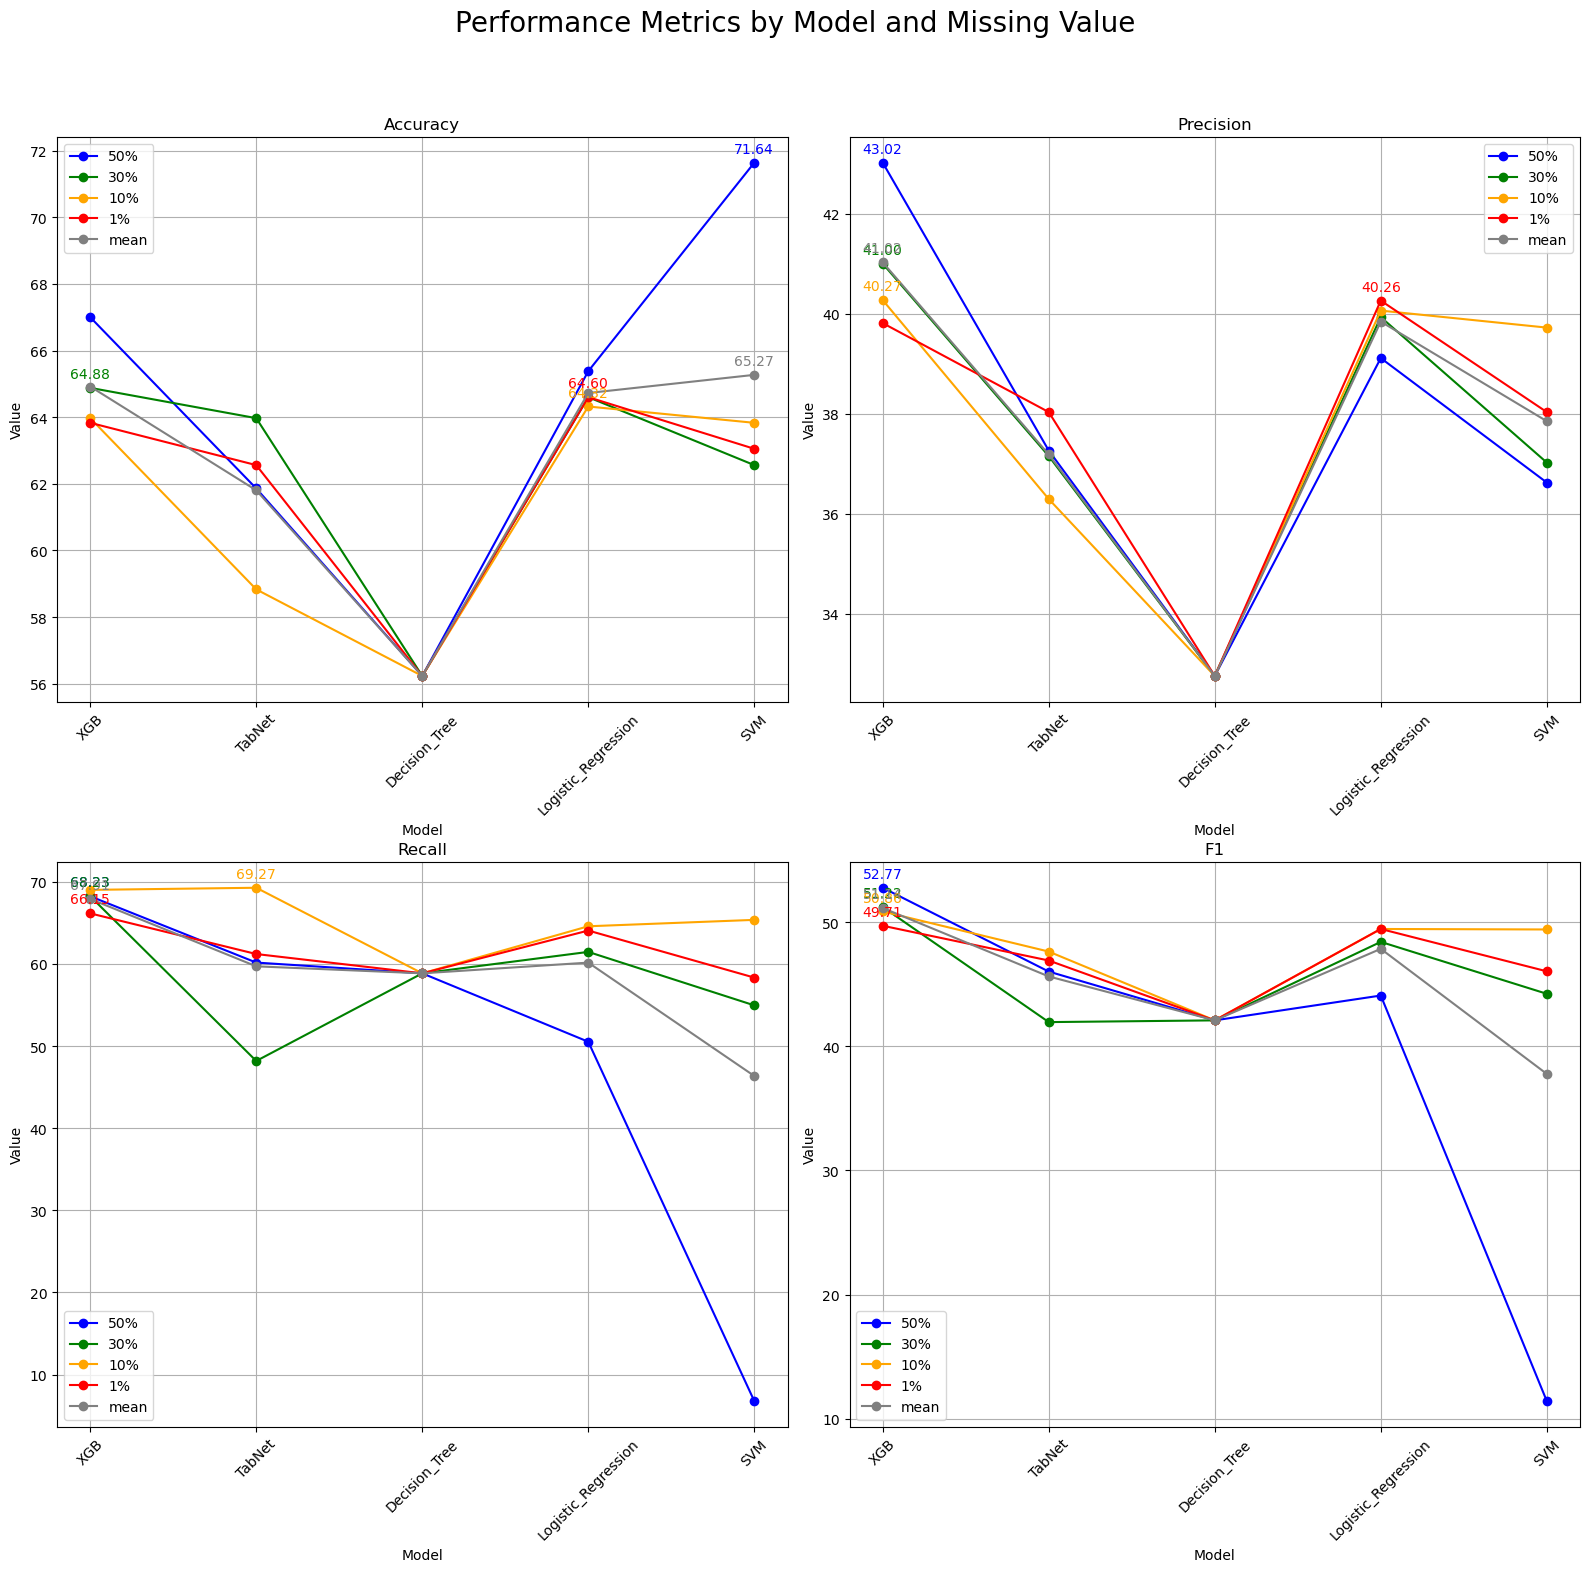

In [3]:
# 성능 지표 리스트
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
fig.suptitle('Performance Metrics by Model and Missing Value', fontsize=20)

# Missing Value 별 색 지정
missing_colors = {'50%': 'blue', '30%': 'green', '10%': 'orange', '1%': 'red', 'mean': 'gray'}

# 색상 리스트 (노란색 제외)
mean_line_colors = ['blue', 'green', 'orange', 'red', 'gray']

# 각 지표에 대해 반복
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    # 각 Missing Value 값에 대해 반복
    for value in df['Missing_Value'].unique():
        subset = df[df['Missing_Value'] == value]
        max_value_idx = subset[metric].idxmax()
        max_value = subset[metric].max()
        max_model = subset.loc[max_value_idx, 'Model']
        
        color = missing_colors[value]
        # 데이터 점을 선으로 연결하여 그래프에 추가
        ax.plot(subset['Model'], subset[metric], marker='o', linestyle='-', label=f"{value}", color=color)
        # 가장 큰 값에 대한 숫자와 모델 이름을 데이터 점 위에 추가
        ax.annotate(f"{max_value:.2f}", xy=(max_model, max_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=color)
        
#     # 각 모델별 평균 값 선 그래프 그리기
#     mean_values = df.groupby('Model')[metric].mean()
#     ax.plot(mean_values.index, mean_values.values, marker='o', linestyle='--', color='black', label='Mean')

    
#     # 각 지표별 평균값의 모델에 대한 인덱스를 가져옴
#     max_mean_value_idx = mean_values.idxmax()
#     max_mean_value = mean_values.max()
#     max_mean_color = missing_colors[df_mean.loc[df_mean['Model'] == max_mean_value_idx, 'Missing_Value'].values[0]]
#     # 평균값의 가장 큰 값을 데이터 점 위에 추가
#     ax.annotate(f"{max_mean_value:.2f}", xy=(max_mean_value_idx, max_mean_value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color=max_mean_color)
    
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel('Value')
    ax.set_xticklabels(df['Model'], rotation=45)
    ax.legend()
    ax.grid(True)

# 그래프 간 간격 조절
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# 그래프 보여주기
plt.show()
